--------------------------
#### Classification with keras (titanic data)
-----------------------------

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 120)

In [2]:
location = r"D:\AI-DATASETS\01-MISC\titanic-train.csv"

In [3]:
df = pd.read_csv(location)

In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Checking for missing data
NAs = pd.concat([df.isnull().sum()], axis=1, keys=['Train'])
NAs[NAs.sum(axis=1) > 0]

,Train
Age,177
Cabin,687
Embarked,2


In [8]:
# drop the Cabin feature since it is missing a lot of the data
df.pop('Cabin')
df.pop('Name')
df.pop('Ticket')

df.shape

(891, 9)

In [9]:
# Filling missing Age values with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [10]:
# Filling missing Embarked values with most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [12]:
df = pd.get_dummies(df)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(['Survived'], axis=1).values
y = df['Survived'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

train_score = classifier.score(X_train, y_train)
test_score  = classifier.score(X_test,  y_test)

print("Train Accuracy:", train_score)
print("Test  Accuracy:", test_score)

Train Accuracy: 0.8038922155688623
Test  Accuracy: 0.8116591928251121


It would be interesting to see whether we are able to outperform this model.

------------------------------
#### Deep learning using keras
--------------------------

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
input_dim = X_train.shape[1]  # Number of features
input_dim

11

#### define keras model

In [75]:
model = Sequential()

model.add(Dense(units             = 8, 
                input_dim         = input_dim, 
                kernel_initializer='uniform', 
                activation        ='relu'))

# model.add(Dense(units             = 8, 
#                 kernel_initializer='uniform', 
#                 activation        ='relu'))

model.add(Dense(units  = 1,  
                kernel_initializer ='uniform',
                activation='sigmoid'))

In [76]:
model.compile( loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 8)                 96        
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 105 (420.00 Byte)
Trainable params: 105 (420.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### plot the model

In [77]:
from keras.utils import plot_model

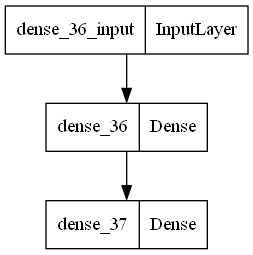

In [78]:
plot_model(model, to_file='model.png')

In [79]:
%%time
history = model.fit(x=X_train, 
                    y=y_train,
                    epochs=200,
                    verbose=0,                           # False or 0, 2 detailed report
                    validation_data=(X_test, y_test),
                    batch_size=10)

CPU times: total: 1min
Wall time: 1min 32s


evaluate the accuracy model:

In [80]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=False)
test_loss,  test_accuracy  = model.evaluate(X_test,  y_test,  verbose=False)

In [81]:
print("Training Accuracy: {:.4f}".format(train_accuracy))
print("Testing Accuracy:  {:.4f}".format(test_accuracy))

Training Accuracy: 0.8107
Testing Accuracy:  0.7978


#### visualize the model performance

In [82]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc     = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss     = history.history['loss']
    val_loss = history.history['val_loss']
    
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

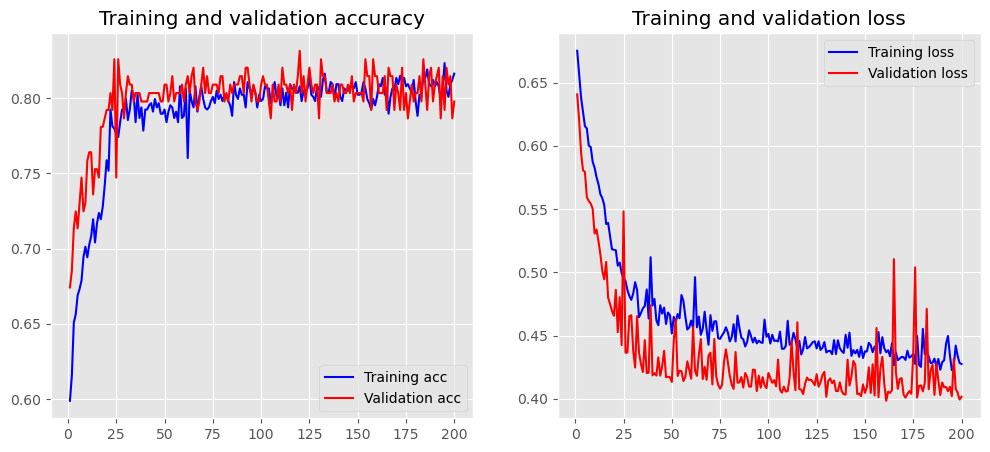

In [83]:
plot_history(history)

#### K-Fold

In [53]:
from sklearn.model_selection import KFold

In [54]:
# define 10-fold cross validation test 
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [62]:
# Create function returning a compiled network
def create_network():
    
    model = Sequential()

    model.add(Dense(units             = 16, 
                    input_dim         = input_dim, 
                    kernel_initializer='uniform', 
                    activation        ='relu'))

    model.add(Dense(units             = 8, 
                    #input_dim         = input_dim, 
                    kernel_initializer='uniform', 
                    activation        ='relu'))

    # model.add(Dense(output_dim = 4, 
    #                 kernel_initializer='uniform', 
    #                 activation='relu'))

    # model.add(Dense(output_dim = 4, 
    #                 kernel_initializer='uniform', 
    #                 activation='relu'))

    model.add(Dense(units  = 1,  
                    kernel_initializer ='uniform',
                    activation='sigmoid'))
    
    # Compile neural network
    model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return model

In [63]:
for train_index, test_index in kfold.split(X, y):  # X is your feature data, y is your target data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = create_network()
    
    model.fit(X_train, 
              y_train, 
              epochs    = 10 ,
              batch_size= 32, 
              verbose   =0)  # Train the model
    
    scores = model.evaluate(X_test, y_test, verbose=0)  # Evaluate the model
    print(f"Accuracy: {scores[1] * 100:.2f}%")

Accuracy: 63.69%
Accuracy: 56.74%
Accuracy: 69.66%
Accuracy: 67.42%
Accuracy: 72.47%
